\begin{tabular}{lllll}
\toprule
{} &                 Re &         nqu1 &        nqu2 &        nqu12 \\
\midrule
0  &  (9.79+/-0.11)e+04 &  176.6+/-3.4 &     208+/-9 &  136.4+/-3.4 \\
1  &  (9.78+/-0.11)e+04 &  138.8+/-2.9 &     145+/-6 &   95.8+/-2.4 \\
2  &  (9.81+/-0.11)e+04 &  110.4+/-2.4 &     120+/-6 &   75.6+/-1.9 \\
3  &  (9.81+/-0.11)e+04 &   92.7+/-2.1 &      93+/-4 &   59.7+/-1.5 \\
4  &  (9.84+/-0.11)e+04 &   76.1+/-1.7 &      77+/-4 &   48.8+/-1.2 \\
5  &  (9.86+/-0.12)e+04 &   69.0+/-1.6 &  68.5+/-3.2 &   43.6+/-1.1 \\
6  &  (9.86+/-0.12)e+04 &   59.8+/-1.4 &  59.1+/-2.8 &   37.5+/-1.0 \\
7  &  (9.88+/-0.12)e+04 &   52.9+/-1.2 &  51.8+/-2.4 &   32.9+/-0.8 \\
8  &  (9.91+/-0.12)e+04 &   45.1+/-1.1 &  45.2+/-2.1 &   28.4+/-0.7 \\
9  &  (9.94+/-0.12)e+04 &   36.0+/-0.9 &  35.5+/-1.7 &   22.5+/-0.6 \\
10 &  (9.94+/-0.12)e+04 &   27.5+/-0.7 &  27.2+/-1.3 &   17.2+/-0.4 \\
11 &  (9.95+/-0.12)e+04 &      0.0+/-0 &     0.0+/-0 &      0.0+/-0 \\
\bottomrule
\end{tabular}



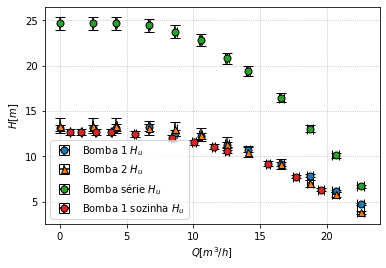

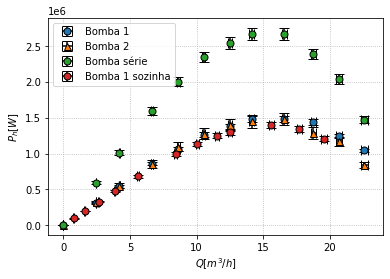

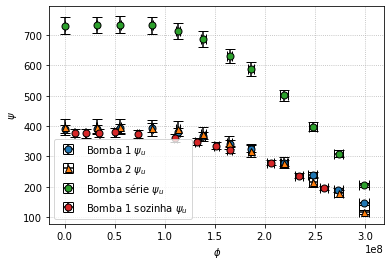

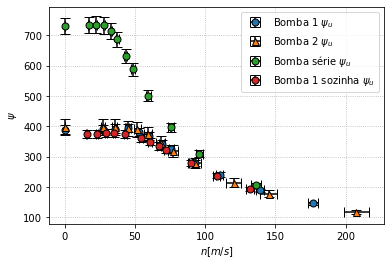

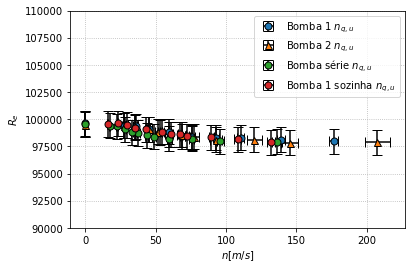

In [5]:
#%matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import uncertainties.unumpy as un
from class_bomba import bomba, Q2v, incert_A, error

rho, g = 997, 9.8067

#Info dos instrumentos
df_inst = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='instr')

#Info medidas -> var pressão etc ...
df_v1 = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v1')
df_v2 = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v2')
df_v12 = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v12')
df_v1sozinha = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TurboMaq/Lab 4 - Associação de bombas em série/dados4.xlsx', sheet_name='v1_sozinha')

#Incerteza do tipo A
ze1 = incert_A(df_inst.ze1.values) / 100  #m
zs1 = incert_A(df_inst.zs1.values) / 100
ze2 = incert_A(df_inst.ze2.values) / 100  #m
zs2 = incert_A(df_inst.zs2.values) / 100
De = incert_A(df_inst.De.values) / 1000
Ds = incert_A(df_inst.Ds.values) / 1000
Drot = incert_A(df_inst.Drot.values) / 100

#Incerteza do tipo B - a/raiz(3) - Val. descarga
v1_pe = un.uarray(-df_v1.pe.values, (df_v1.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
v1_ps = un.uarray(df_v1.ps.values, (df_v1.ps.values*0.05)/np.sqrt(3)) * 1e3 #Pa
v1_Q = un.uarray(df_v1.Q.values, (df_v1.Q.values*0.02)/np.sqrt(3)) #m^3/h
v1_w = un.uarray(df_v1.w.values, (df_v1.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - a/raiz(3) - Val. sucção
v2_pe = un.uarray(df_v2.pe.values, (df_v2.pe.values*0.05)/np.sqrt(3)) * 1e3 #Pa CUIDADO PORRA
v2_ps = un.uarray(df_v2.ps.values, (df_v2.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
v2_Q = un.uarray(df_v2.Q.values, (df_v2.Q.values*0.02)/np.sqrt(3)) #m^3/h
v2_w = un.uarray(df_v2.w.values, (df_v2.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - a/raiz(3) - Val. sucção
v12_pe = un.uarray(df_v12.pe.values, (df_v12.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa CUIDADO PORRA
v12_ps = un.uarray(df_v12.ps.values, (df_v12.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
v12_Q = un.uarray(df_v12.Q.values, (df_v12.Q.values*0.02)/np.sqrt(3)) #m^3/h
v12_w = un.uarray(df_v12.w.values, (df_v12.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

#Incerteza do tipo B - a/raiz(3) - Val. sucção
vs_pe = un.uarray(-df_v1sozinha.pe.values, (df_v1sozinha.pe.values*0.05)/np.sqrt(3)) * 98066.5 #Pa CUIDADO PORRA
vs_ps = un.uarray(df_v1sozinha.ps.values, (df_v1sozinha.ps.values*0.05)/np.sqrt(3)) * 98066.5 #Pa
vs_Q = un.uarray(df_v1sozinha.Q.values, (df_v1sozinha.Q.values*0.02)/np.sqrt(3)) #m^3/h
vs_w = un.uarray(df_v1sozinha.w.values, (df_v1sozinha.w.values*0.02)/np.sqrt(3)) * 0.016667 #Hz

b1  = bomba(v1_pe, v1_ps, Q2v(v1_Q, De), Q2v(v1_Q, Ds), ze1, zs1)
b2  = bomba(v2_pe, v2_ps, Q2v(v2_Q, Ds), Q2v(v2_Q, Ds), ze2, zs2)
b12  = bomba(v12_pe, v12_ps, Q2v(v12_Q, De), Q2v(v12_Q, Ds), ze1, zs2)
b1soz  = bomba(vs_pe, vs_ps, Q2v(vs_Q, De), Q2v(vs_Q, Ds), ze1, zs1)


# Figura 1 
#%matplotlib
fig, ax = plt.subplots()
ax.set(ylabel=r'$H [m]$', xlabel=r'$Q [m^3/h]$')

#Bomba 1
#error(v1_Q, b1.hm, 'o', r'Bomba 1 $H_m$', ax)
error(v1_Q, b1.hu, 'o', r'Bomba 1 $H_u$', ax)

#Bomba 2
#error(v2_Q, b2.hm, '^', r'Bomba 2 $H_m$', ax)
error(v2_Q, b2.hu, '^', r'Bomba 2 $H_u$', ax)

#Bomba 12
#error(v12_Q, b12.hm, 'o', r'Bomba série $H_m$', ax)
error(v12_Q, b12.hu, 'o', r'Bomba série $H_u$', ax)
error(vs_Q, b1soz.hu, 'o', r'Bomba 1 sozinha $H_u$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('H_x_Q.pdf', bbox_inches='tight')

#tab = pd.DataFrame({'v2_Q':v2_Q, 'Hu1':b1.hu, 'Hu2':b2.hu, 'Hu12':b12.hu})
#print(tab.to_latex())

# Figura 2
fig, ax = plt.subplots()
ax.set(ylabel=r'$P_h[W]$', xlabel=r'$Q[m^3/h]$')

error(v1_Q, b1.ph(v1_Q), 'o', 'Bomba 1', ax)
error(v2_Q, b2.ph(v2_Q), '^', 'Bomba 2', ax)
error(v12_Q, b12.ph(v12_Q), 'o', 'Bomba série', ax)
error(vs_Q, b1soz.ph(vs_Q), 'o', 'Bomba 1 sozinha', ax)
       
ax.legend()
ax.grid(ls='dotted')
fig.savefig('P_x_Q.pdf', bbox_inches='tight')

#tab = pd.DataFrame({'Q':v2_Q, 'Ph1':b1.ph(v2_Q), 'Ph2':b2.ph(v2_Q), 'Ph12':b12.ph(v2_Q)})
#print(tab.to_latex())

# Figura 3
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$\phi$')

#Bomba 1
#error(b1.phi(v1_Q, v1_w, De), b1.psi_m(v1_w, De), 'o', r'Bomba 1 $\psi_{m}$', ax)
error(b1.phi(v1_Q, v1_w, De), b1.psi_u(v1_w, De), 'o', r'Bomba 1 $\psi_{u}$', ax)

#Bomba 2
#error(b2.phi(v2_Q, v2_w, De), b2.psi_m(v2_w, De), '^', r'Bomba 2 $\psi_{m}$', ax)
error(b2.phi(v2_Q, v2_w, De), b2.psi_u(v2_w, De), '^', r'Bomba 2 $\psi_{u}$', ax)

#Bomba série
#error(b12.phi(v12_Q, v12_w, De), b12.psi_m(v12_w, De), 'o', r'Bomba série $\psi_{m}$', ax)
error(b12.phi(v12_Q, v12_w, De), b12.psi_u(v12_w, De), 'o', r'Bomba série $\psi_{u}$', ax)
error(b1soz.phi(vs_Q, vs_w, De), b1soz.psi_u(vs_w, De), 'o', r'Bomba 1 sozinha $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_phi.pdf', bbox_inches='tight')

#tab = pd.DataFrame({'phi':b1.phi(v1_Q, v1_w, De), 'psi_u1':b1.psi_u(v1_w, De), 'psi_u2':b2.psi_u(v2_w, De), 'psi_u12':b12.psi_u(v12_w, De)})
#print(tab.to_latex())

# Figura 4
fig, ax = plt.subplots()
ax.set(ylabel=r'$\psi$', xlabel=r'$n [m/s]$')

#Bomba 1
#error(b1.nq_m(v1_Q, v1_w), b1.psi_m(v1_w, De), 'o', r'Bomba 1 $\psi_{m}$', ax)
error(b1.nq_u(v1_Q, v1_w), b1.psi_u(v1_w, De), 'o', r'Bomba 1 $\psi_{u}$', ax)

#Bomba 2
#error(b2.nq_m(v2_Q, v2_w), b2.psi_m(v2_w, De), '^', r'Bomba 2 $\psi_{m}$', ax)
error(b2.nq_u(v2_Q, v2_w), b2.psi_u(v2_w, De), '^', r'Bomba 2 $\psi_{u}$', ax)

#Bomba série
#error(b12.nq_m(v12_Q, v12_w), b12.psi_m(v12_w, De), 'o', r'Bomba série $\psi_{m}$', ax)
error(b12.nq_u(v12_Q, v12_w), b12.psi_u(v12_w, De), 'o', r'Bomba série $\psi_{u}$', ax)
error(b1soz.nq_u(vs_Q, vs_w), b1soz.psi_u(vs_w, De), 'o', r'Bomba 1 sozinha $\psi_{u}$', ax)

ax.legend()
ax.grid(ls='dotted')
fig.savefig('psi_x_n.pdf', bbox_inches='tight')

#tab = pd.DataFrame({'psi_u1':b2.psi_u(v2_w, De), 'psi_u2':b2.psi_u(v2_w, De), 'psi_u12':b12.psi_u(v12_w, De), 'nqu1':b1.nq_u(v1_Q, v1_w), 'nqu2':b2.nq_u(v2_Q, v2_w), 'nqu12':b12.nq_u(v12_Q, v12_w)})
#print(tab.to_latex())

# Figura 5
viscosidade = 0.893e-6
fig, ax = plt.subplots()
ax.set(ylabel=r'$R_e$', xlabel=r'$n[m/s]$')

#descarga
error(b1.nq_u(v1_Q, v1_w), b1.Re(v1_w, De, viscosidade), 'o', r'Bomba 1 $n_{q,u}$', ax)

#sucção
error(b2.nq_u(v2_Q, v2_w), b2.Re(v2_w, De, viscosidade), '^', r'Bomba 2 $n_{q,u}$', ax)
error(b12.nq_u(v12_Q, v12_w), b12.Re(v12_w, De, viscosidade), 'o', r'Bomba série $n_{q,u}$', ax)
error(b1soz.nq_u(vs_Q, vs_w), b1soz.Re(vs_w, De, viscosidade), 'o', r'Bomba 1 sozinha $n_{q,u}$', ax)

ax.legend()
ax.grid(ls='dotted')

fig.savefig('Re_x_n.pdf', bbox_inches='tight')
tab = pd.DataFrame({'Re':b2.Re(v2_w, De, viscosidade), 'nqu1':b1.nq_u(v1_Q, v1_w), 'nqu2':b2.nq_u(v2_Q, v2_w), 'nqu12':b12.nq_u(v12_Q, v12_w)})
print(tab.to_latex())